# Yulu Business Case Study

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, probplot, levene, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import math

## Problem Statement

The problem statement for this project is to analyze and predict the demand for shared electric cycles in the Indian market by identifying significant variables that influence this demand and evaluating how well these variables explain the fluctuations in electric cycle usage.

## 1. Basic Analysis and understanding the data

In [2]:
#load the dataset
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Yulu\yulu_original_bike_sharing.csv")

### Observation of the data

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
# Get an overview of the dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Summary statistics of numerical columns
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# Uniques values and it's count unique fo all the columns
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [8]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 2. Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

### a. Workingday

In [118]:
# ANOVA test for Workingday vs. Count
workingday_groups = []
for value in df['workingday'].unique():
    workingday_groups.append(df[df['workingday'] == value]['count'])
    
f_statistic, p_value = f_oneway(*workingday_groups)
print("ANOVA - Workingday vs. Count:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA - Workingday vs. Count:
F-statistic: 1.4631992635777575
p-value: 0.22644804226428558


#### Interpretation: 
The p-value is greater than 0.05 (common significance level), which suggests that there is no significant difference in the mean 'Count' between working days and non-working days (weekends and holidays). In other words, the 'Workingday' variable does not appear to have a significant impact on the demand for shared electric cycles.

### b. Weather

In [119]:
# ANOVA test for Weather vs. Count
weather_groups = []
for value in df['weather'].unique():
    weather_groups.append(df[df['weather'] == value]['count'])

f_statistic, p_value = f_oneway(*weather_groups)
print("ANOVA - Weather vs. Count:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA - Weather vs. Count:
F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42


#### Interpretation: 
The p-value is extremely small, indicating a highly significant difference in the mean 'Count' across different weather conditions. This suggests that the 'Weather' variable is a significant predictor of the demand for shared electric cycles.

### c. Season

In [120]:
# ANOVA test for Season vs. Count
season_groups = []
for value in df['season'].unique():
    season_groups.append(df[df['season'] == value]['count'])
    
f_statistic, p_value = f_oneway(*season_groups)
print("ANOVA - Season vs. Count:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA - Season vs. Count:
F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149


#### Interpretation: 
The p-value is extremely small, indicating a highly significant difference in the mean 'Count' across different seasons. This implies that the 'Season' variable is a significant predictor of the demand for shared electric cycles.

## 3. Select an appropriate test to check whether:

- Working Day has effect on number of electric cycles rented
- No. of cycles rented similar or different in different seasons
- No. of cycles rented similar or different in different weather
- Weather is dependent on season (check between 2 predictor variable)


### a. Working Day vs. Number of Electric Cycles Rented

- Null Hypothesis (H0): There is no significant difference in the number of cycles rented on working days vs. non-working days.
- Alternative Hypothesis (Ha): There is a significant difference in the number of cycles rented on working days vs. non-working days.

In [15]:
#Creating groups
working_day_group = df.loc[df['workingday'] == 1]['count']
non_working_day_group = df.loc[df['workingday'] == 0]['count']

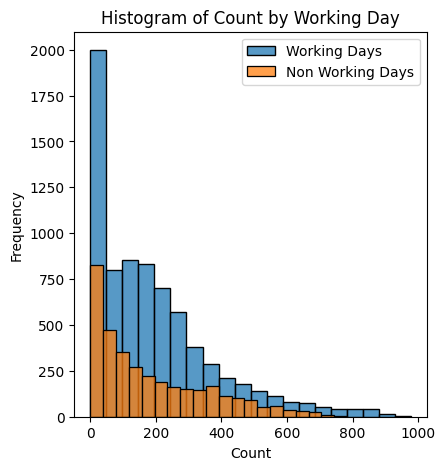

In [41]:
# Plotting histograms
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(data = working_day_group, label = 'Working Days', bins = 20)
sns.histplot(data = non_working_day_group, label = 'Non Working Days', bins = 20)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Count by Working Day')
plt.show()

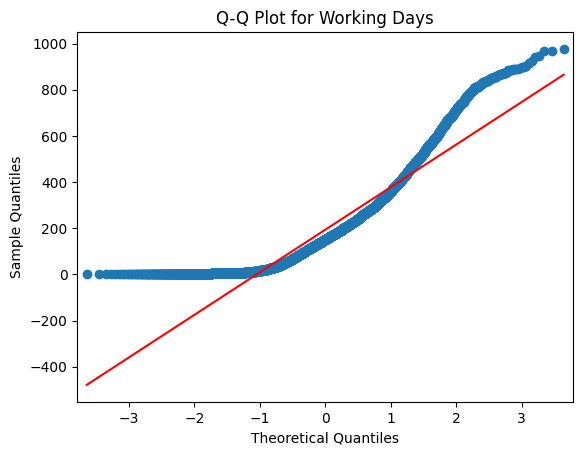

In [121]:
# Q-Q plot
qqplot(data = working_day_group, line='s')
plt.title('Q-Q Plot for Working Days')
plt.show()

- QQplot confirms that the data is not normally distributed

In [125]:
# Levene's test
_, p_value_levene = levene(working_day_group, non_working_day_group)
print("Levene's Test p-value:", p_value_levene)

Levene's Test p-value: 0.9437823280916695


    The Levene's test p-value of approximately 0.944 suggests that there is no significant difference in the variances of the number of cycles rented between working days and non-working days. This means that the assumption of equal variances between the two groups (working days and non-working days) is met.

In [127]:
# Performing an independent samples t-test to calculate the test statistics and P value
alpha = 0.05
t_statistic, p_value = ttest_ind(working_day_group, non_working_day_group)
print('Working Day vs Number of Electric Cycles Rented')
print('t_statistic:', t_statistic)
print('p_value:', p_value)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the number of cycles rented on working days vs. non-working days.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the number of cycles rented on working days vs. non-working days.")

Working Day vs Number of Electric Cycles Rented
t_statistic: 1.2096277376026694
p_value: 0.22644804226361348
Fail to reject the null hypothesis
There is no significant difference in the number of cycles rented on working days vs. non-working days.


#### Inference:
Based on the results of the independent samples t-test, with a t-statistic of approximately 1.21 and a p-value of approximately 0.226, we fail to reject the null hypothesis. This means that there is no significant difference in the number of electric cycles rented on working days vs. non-working days. In other words, it appears that the day of the week (working day or non-working day) does not have a significant impact on the demand for shared electric cycles.

### b. No. of cycles rented similar or different in different seasons

- Null Hypothesis (H0): There is no significant difference in the number of cycles rented across different seasons.
- Alternative Hypothesis (Ha):  There is a significant difference in the number of cycles rented across different seasons.

In [19]:
# Creating data groups for different seasons
spring = df.loc[df['season'] == 1]['count']
summer = df.loc[df['season'] == 2]['count']
fall = df.loc[df['season'] == 3]['count']
winter = df.loc[df['season'] == 4]['count']

<function matplotlib.pyplot.show(close=None, block=None)>

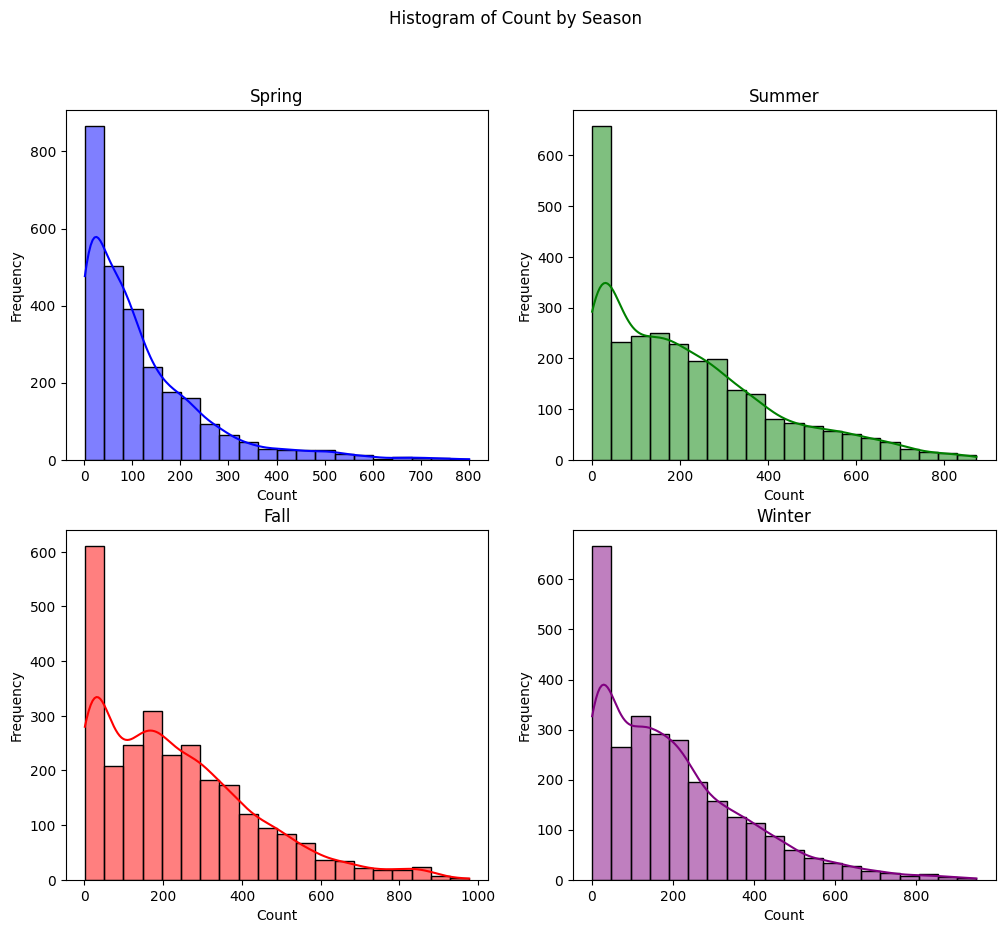

In [128]:
# Plotting histograms
plt.figure(figsize=(12,10))
plt.suptitle('Histogram of Count by Season')
plt.subplot(221)
sns.histplot(data=spring, bins=20, label='Spring', color='blue', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Spring')
plt.subplot(222)
sns.histplot(data=summer, bins=20, label='Summer', color='green', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Summer')
plt.subplot(223)
sns.histplot(data=fall, bins=20, label='Fall', color='red', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Fall')
plt.subplot(224)
sns.histplot(data=winter, bins=20, label='Winter', color='purple', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Winter')
plt.show

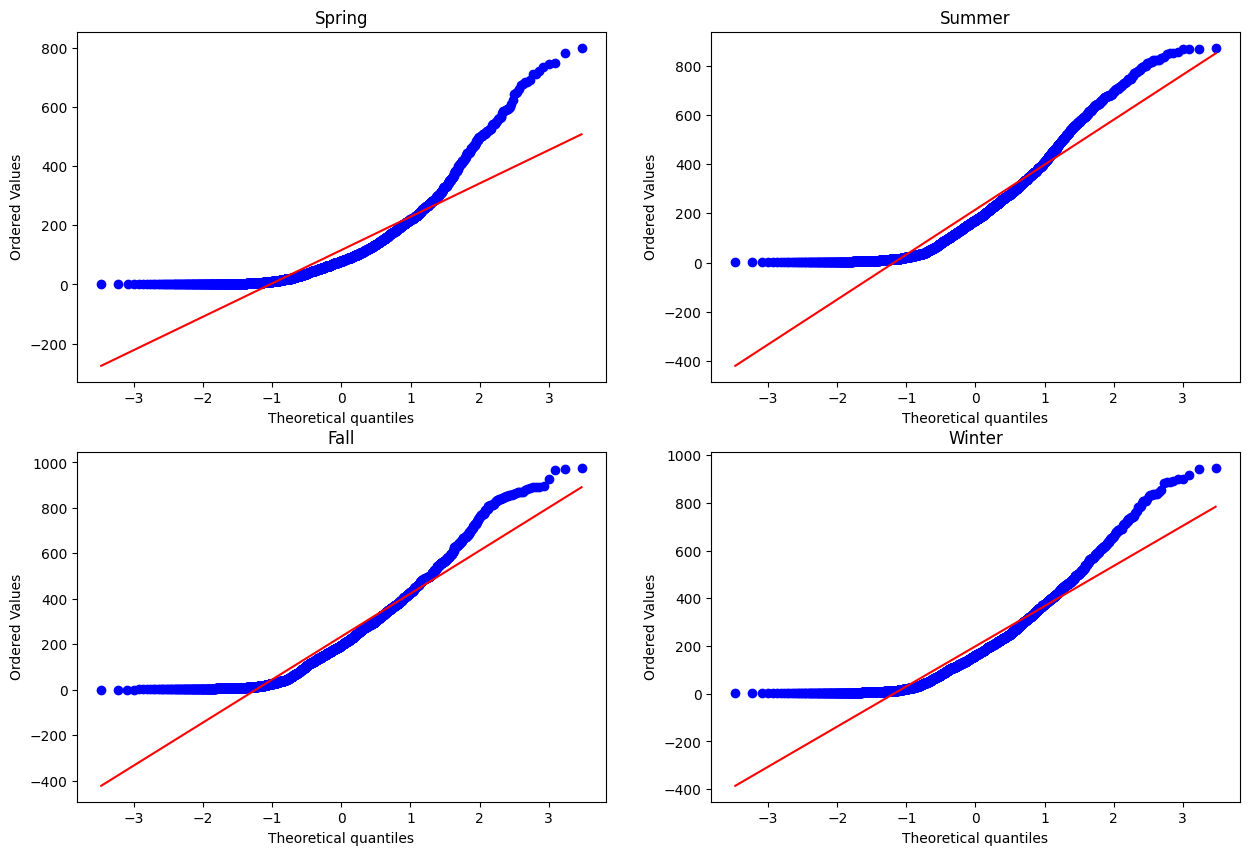

In [129]:
# Plotting Q-Q plots
plt.figure(figsize=(15,10))
plt.subplot(221)
probplot(spring, plot=plt)
plt.title('Spring')
plt.subplot(222)
probplot(summer, plot=plt)
plt.title('Summer')
plt.subplot(223)
probplot(fall, plot=plt)
plt.title('Fall')
plt.subplot(224)
probplot(winter, plot=plt)
plt.title('Winter')
plt.show()

- QQplot confirms that the data is not normally distributed

In [47]:
# Levene's test
statistic, p_value = levene(spring, summer, fall, winter)
print("Levene's Test p_value:", p_value)

Levene's Test p_value: 1.0147116860043298e-118


- Based on the very small p-value (approximately 1.0147e-118), we can conclude that there is a significant difference in the variances of the number of cycles rented among the different seasons. This suggests that the assumption of equal variances required for ANOVA may not be met.

In [130]:
#Performing ANOVA test on the seasons
alpha = 0.05
f_statistic, p_value_anova = f_oneway(spring, summer, fall, winter)
print("F-statistic:", f_statistic)
print("p-value:", p_value_anova)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the number of cycles rented across different seasons.")

F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Fail to reject the null hypothesis
There is no significant difference in the number of cycles rented across different seasons.


#### Inference:
Based on the ANOVA test results, there is strong evidence to suggest that there is a significant difference in the number of cycles rented across different seasons. In other words, the season appears to have a significant impact on the demand for shared electric cycles in the dataset.

### c. No. of cycles rented similar or different in different weather

- Null Hypothesis (H0): There is no significant difference in the number of cycles rented across different weather conditions.
- Alternative Hypothesis (Ha):  There is a significant difference in the number of cycles rented across different weather conditions.

In [131]:
# Creating data groups for different weathers
clear = df.loc[df['weather'] == 1]['count']
mist = df.loc[df['weather'] == 2]['count']
light_snow = df.loc[df['weather'] == 3]['count']
heavy_rain = df.loc[df['weather'] == 4]['count']

<function matplotlib.pyplot.show(close=None, block=None)>

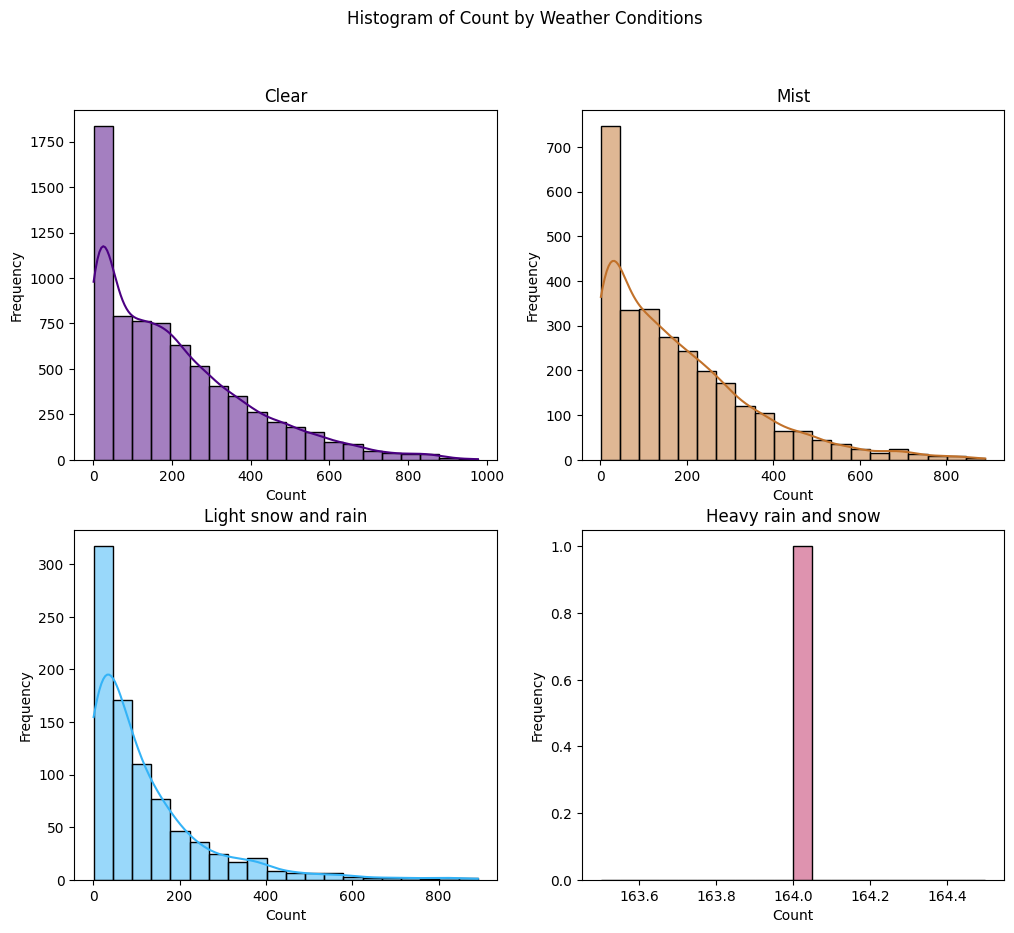

In [69]:
# Plotting histograms
plt.figure(figsize=(12,10))
plt.suptitle('Histogram of Count by Weather Conditions')
plt.subplot(221)
sns.histplot(data=clear, bins=20, label='Clear', color='indigo', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Clear')
plt.subplot(222)
sns.histplot(data=mist, bins=20, label='Mist', color='#c1712a', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Mist')
plt.subplot(223)
sns.histplot(data=light_snow, bins=20, label='Light snow and rain', color='#34b3f7', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Light snow and rain')
plt.subplot(224)
sns.histplot(data=heavy_rain, bins=20, label='Heavy rain and snow', color='#bf2961', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Heavy rain and snow')
plt.show

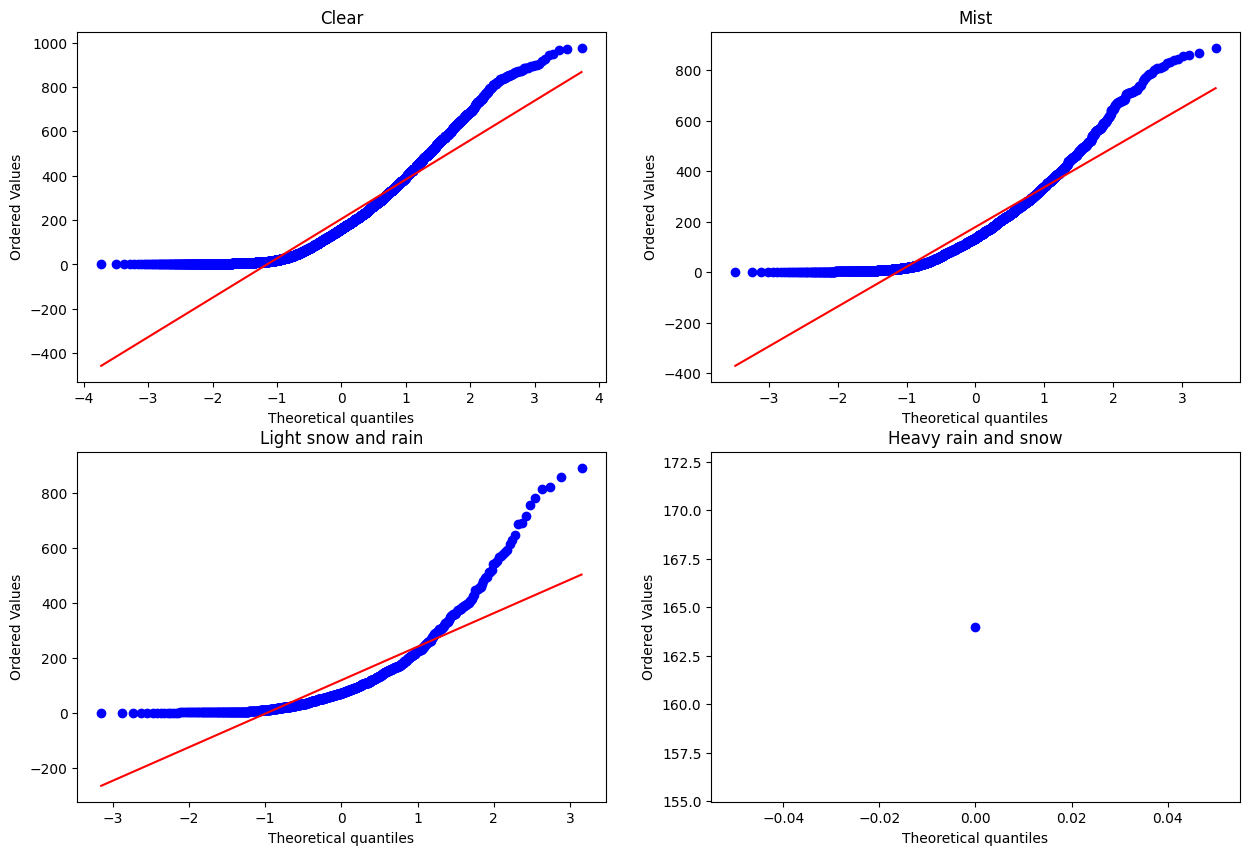

In [72]:
# Plotting Q-Q plots
plt.figure(figsize=(15,10))
plt.subplot(221)
probplot(clear, plot=plt)
plt.title('Clear')
plt.subplot(222)
probplot(mist, plot=plt)
plt.title('Mist')
plt.subplot(223)
probplot(light_snow, plot=plt)
plt.title('Light snow and rain')
plt.subplot(224)
probplot(heavy_rain, plot=plt)
plt.title('Heavy rain and snow')
plt.show()

In [89]:
# Perofrming Shapiro test
_, p_value_shapiro_clear = shapiro(clear)
_, p_value_shapiro_mist = shapiro(mist)
_, p_value_shapiro_light_snow = shapiro(light_snow)
print("Shapiro-Wilk Test p-values:")
print("Clear:", p_value_shapiro_clear)
print("Mist:", p_value_shapiro_mist)
print("Light Snow/Rain:", p_value_shapiro_light_snow)

Shapiro-Wilk Test p-values:
Clear: 0.0
Mist: 9.781063280987223e-43
Light Snow/Rain: 3.876090133422781e-33


In [90]:
_, p_value_levene = levene(clear, mist, light_snow, heavy_rain)
print("Levene's Test p-value:", p_value_levene)

Levene's Test p-value: 3.504937946833238e-35


- The Levene's test p-value is also extremely small (close to zero), indicating a significant difference in variances between the weather groups. This confirms the unequal variances assumption.

In [91]:
#Performing ANOVA test on the different weather conditions
alpha = 0.05
f_statistic, p_value_anova = f_oneway(clear, mist, light_snow, heavy_rain)
print("F-statistic:", f_statistic)
print("p-value:", p_value_anova)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the number of cycles rented across different weather conditions.")

F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject the null hypothesis
There is a significant difference in the number of cycles rented across different weather conditions.


#### Inference:
Based on the ANOVA test results, there is strong evidence to suggest that there is a significant difference in the number of cycles rented across different weather conditions. In other words, the weather condition appears to have a significant impact on the demand for shared electric cycles in the dataset.

### d. Weather is dependent on season (check between 2 predictor variable)

- Null Hypothesis (H0): Weather and season are independent variables (there is no association between them).
- Alternative Hypothesis (Ha):  Weather and season are dependent variables (there is an association between them).

In [93]:
# Creating a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

In [101]:
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [100]:
# Perform chi-square test
chi_stat, p_value_chi, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi_stat)
print("p-value (chi-square test):", p_value_chi)

# Check if the p-value is less than alpha
if p_value_chi < alpha:
    print("Reject the null hypothesis")
    print("Weather and season are dependent variables (there is an association between them).")
else:
    print("Fail to reject the null hypothesis")
    print("Weather and season are independent variables (there is no association between them).")

Chi-square statistic: 49.15865559689363
p-value (chi-square test): 1.5499250736864862e-07
Reject the null hypothesis
Weather and season are dependent variables (there is an association between them).


#### Inference:
Based on the chi-square test results, there is strong evidence to suggest that weather and season are dependent variables, and there is an association between them. In other words, the choice of weather condition (e.g., Clear, Mist, Light Snow/Rain) is not independent of the season in the dataset.

# Final insights and recommendations

Based on the above analysis conducted on the provided data on Yulu shared electric cycle rental here are some of the insights and recommendations:

#### Impact of Working Days: 
    The analysis indicates that there is no significant difference in the number of electric cycles rented between working days and non-working days (weekends and holidays). This suggests that the day of the week (working day or non-working day) does not have a significant impact on the demand for shared electric cycles. Yulu may consider focusing its marketing efforts and promotions on both working days and non-working days to ensure consistent usage.

#### Seasonal Impact: 
    The analysis shows a significant difference in the number of cycles rented across different seasons. It is important for Yulu to recognize that seasonal variations in demand exist. To optimize operations and resources, Yulu can adapt its fleet size, maintenance schedules, and marketing strategies to align with seasonal trends.

#### Weather Impact: 
    The analysis also reveals a significant difference in the number of cycles rented across different weather conditions. This suggests that weather plays a role in influencing the demand for shared electric cycles. Yulu should consider implementing strategies for different weather conditions. For example, during adverse weather conditions like heavy rain or snow, Yulu could provide incentives or promotions to encourage usage.

#### Weather-Season Association: 
    The analysis indicates that there is an association between weather conditions and seasons. Yulu can leverage this insight to predict and plan for weather-related variations in demand. For instance, during seasons with specific weather patterns (e.g., monsoon season with heavy rain), Yulu can prepare for potential disruptions and adjust its operations accordingly.

#### Promotions and Marketing: 
    Develop marketing campaigns and promotions that are tailored to specific seasons and weather conditions. Yulu can offer incentives or discounts during seasons with lower demand to boost ridership.

#### User Experience: 
    Ensure that user experience is optimized, especially during adverse weather conditions. Providing information on weather-appropriate gear (e.g., rain gear) or offering sheltered pick-up and drop-off points can enhance customer satisfaction.

#### Collaboration: 
    Collaborate with local weather forecasting services to receive timely weather updates, enabling Yulu to make real-time adjustments to its operations and user communication.

These recommendations should help Yulu make data-driven decisions to improve its services, optimize resource allocation, and enhance the overall experience for its users while considering the impact of working days, seasons, and weather conditions.